In [46]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler ,normalize
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
file_path = r"/content/Diabetes.zip"
diabetes_dataset = pd.read_csv(file_path)
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
print("data frame shape :",diabetes_dataset.shape)
print("feature_names",diabetes_dataset.columns)

data frame shape : (768, 9)
feature_names Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [10]:
print(diabetes_dataset.Outcome.value_counts())
missing_values = diabetes_dataset.isnull().sum()
print(missing_values)

Outcome
0    500
1    268
Name: count, dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
diabetes_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [59]:
diabetes_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

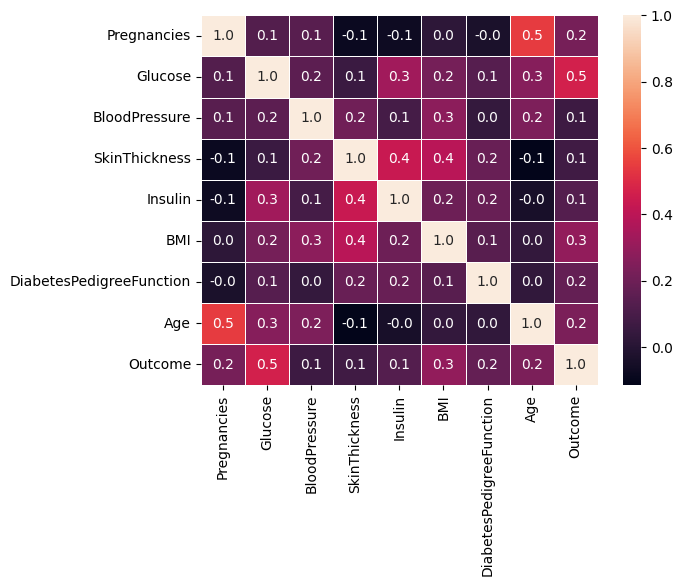

In [60]:
sns.heatmap(diabetes_dataset.corr(),annot=True,fmt='0.1f',linewidth=.5)

<ipython-input-61-48e646d047bd>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Pregnancies'])


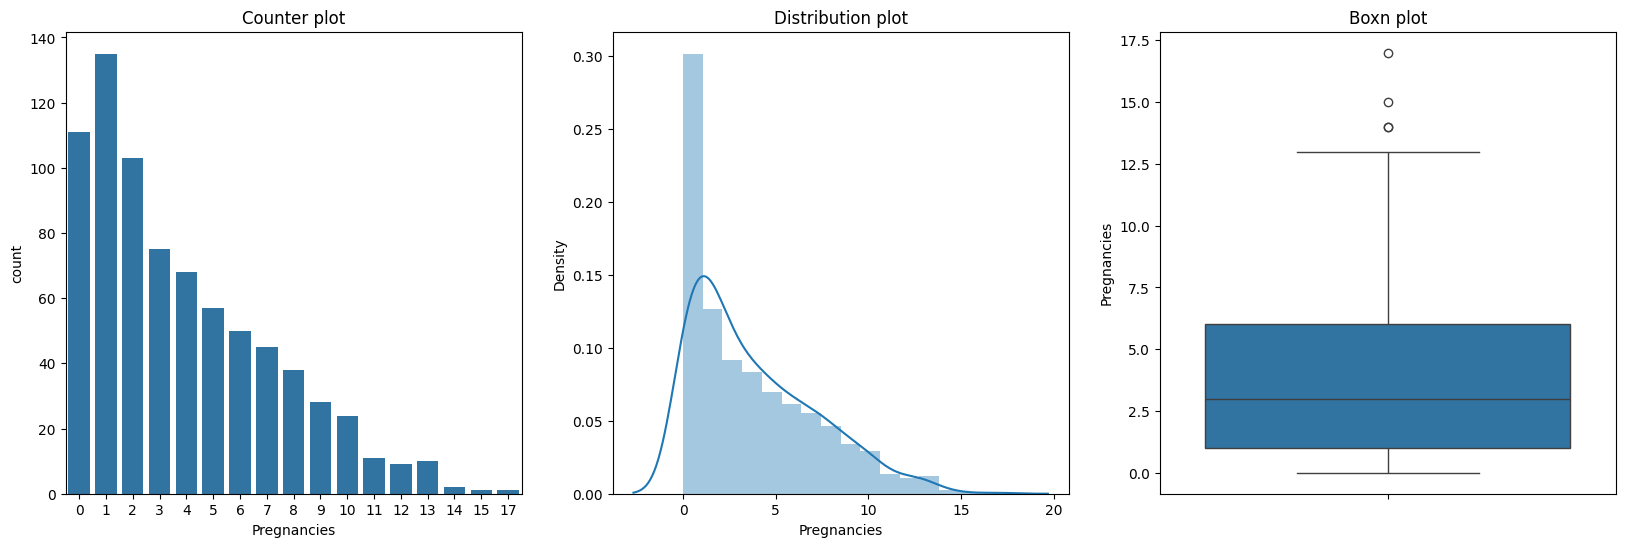

In [61]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Counter plot')
sns.countplot(x='Pregnancies',data=data)

plt.subplot(1,3,2)
plt.title('Distribution plot')
sns.distplot(data['Pregnancies'])

plt.subplot(1,3,3)
plt.title('Boxn plot')
sns.boxplot(y=data['Pregnancies'])
plt.show()

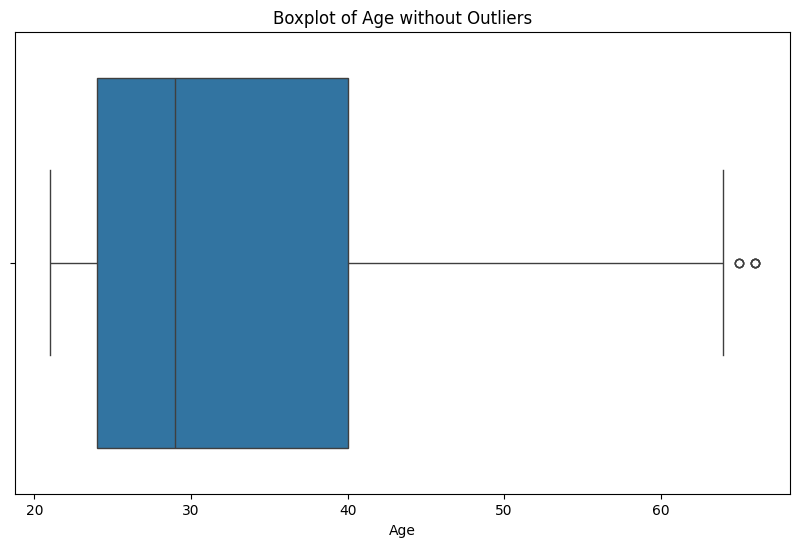

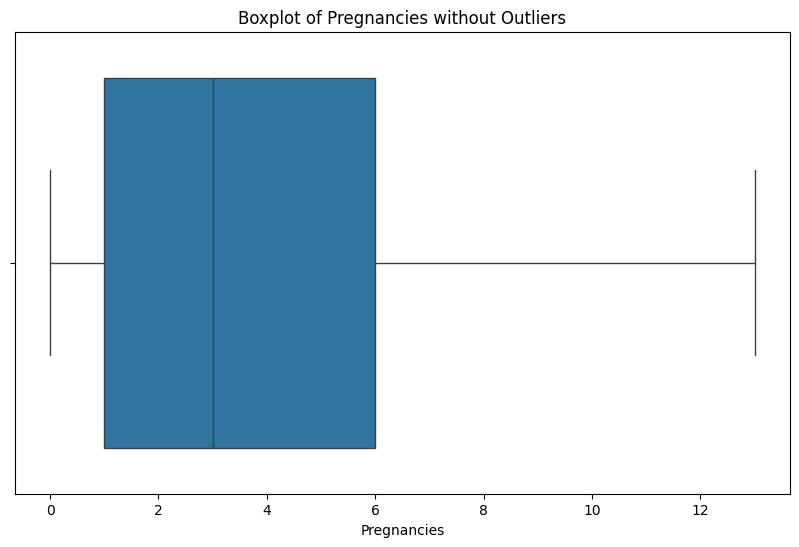

In [47]:
# Calculate IQR for Age
Q1_Age = diabetes_dataset['Age'].quantile(0.25)
Q3_Age = diabetes_dataset['Age'].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age
lower_bound_Age = Q1_Age - 1.5 * IQR_Age
upper_bound_Age = Q3_Age + 1.5 * IQR_Age

# Calculate IQR for Pregnancies
Q1_Pregnancies = diabetes_dataset['Pregnancies'].quantile(0.25)
Q3_Pregnancies = diabetes_dataset['Pregnancies'].quantile(0.75)
IQR_Pregnancies = Q3_Pregnancies - Q1_Pregnancies
lower_bound_Pregnancies = Q1_Pregnancies - 1.5 * IQR_Pregnancies
upper_bound_Pregnancies = Q3_Pregnancies + 1.5 * IQR_Pregnancies

# Remove outliers
diabetes_dataset_no_outliers = diabetes_dataset[
    (diabetes_dataset['Age'] >= lower_bound_Age) & (diabetes_dataset['Age'] <= upper_bound_Age) &
    (diabetes_dataset['Pregnancies'] >= lower_bound_Pregnancies) & (diabetes_dataset['Pregnancies'] <= upper_bound_Pregnancies)
]

# Plot the data without outliers for Age
plt.figure(figsize=(10, 6))
sns.boxplot(x=diabetes_dataset_no_outliers['Age'])
plt.title('Boxplot of Age without Outliers')
plt.show()

# Plot the data without outliers for Pregnancies
plt.figure(figsize=(10, 6))
sns.boxplot(x=diabetes_dataset_no_outliers['Pregnancies'])
plt.title('Boxplot of Pregnancies without Outliers')
plt.show()


In [48]:
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [13]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [14]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=0)

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check the data types
print(X_train.dtype, Y_train.dtype)

float64 int64


In [51]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [52]:
classifier = svm.SVC(kernel='linear')

In [53]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [54]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [55]:
print('Training Accuracy : ', training_data_accuracy)

Training Accuracy :  0.7801302931596091


In [56]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [57]:
print('Test Acuuracy : ', test_data_accuracy)

Test Acuuracy :  0.7792207792207793


In [58]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


In [63]:
import pickle
filename = 'trained_model.save'
pickle.dump(classifier, open(filename, 'wb'))

loaded_model = pickle.load(open('trained_model.save', 'rb'))

input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
